In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
len(x_train)  

60000

In [4]:
len(x_test) 

10000

In [5]:
len(y_test)

10000

In [6]:
len(y_train)

60000

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

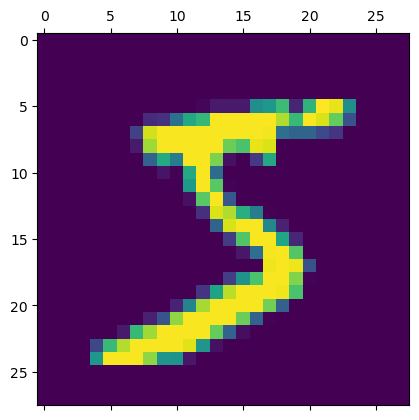

In [9]:
plt.matshow(x_train[0])

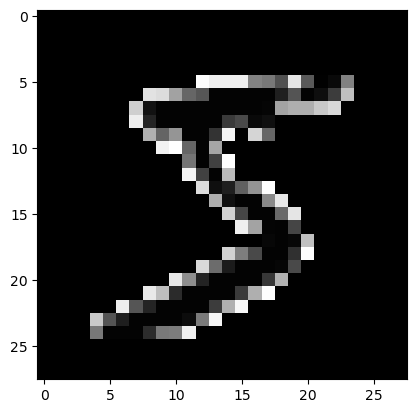

In [10]:
plt.imshow(-x_train[0], cmap="gray")


In [11]:
x_train = x_train / 255
x_test = x_test / 255


In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [14]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),    #Input layer
keras.layers.Dense(128, activation="relu"),    #hidden layer abs
keras.layers.Dense(10, activation="softmax")   #output layer
])
model.summary()


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer="sgd",   # Stochastic Gradient Descent
loss="sparse_categorical_crossentropy",    # crossentropy reduces the loss
metrics=['accuracy'])

In [16]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)   

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1161 - loss: 2.3006 - val_accuracy: 0.1135 - val_loss: 2.2994
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1127 - loss: 2.2997 - val_accuracy: 0.1135 - val_loss: 2.2990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1122 - loss: 2.2993 - val_accuracy: 0.1135 - val_loss: 2.2988
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1119 - loss: 2.2994 - val_accuracy: 0.1135 - val_loss: 2.2982
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1106 - loss: 2.2990 - val_accuracy: 0.1135 - val_loss: 2.2980
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1097 - loss: 2.2984 - val_accuracy: 0.1135 - val_loss: 2.2976
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1121 - loss: 2.2980 - val_accuracy: 0.1135 - val_loss: 2.2971
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1116 - loss: 2.2974 

In [17]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1160 - loss: 2.2958
Loss=2.296
Accuracy=0.113


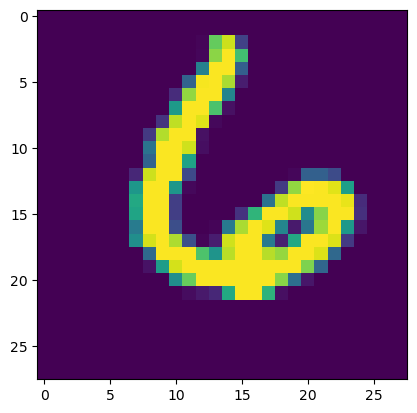

In [18]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()



In [19]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Handwritten number in the image is= 1


In [20]:
history.history??

Type:        dict
String form: {'accuracy': [0.11311666667461395, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581], 'loss': [2.3002381324768066, 2.2996013164520264, 2.299252510070801, 2.2988998889923096, 2.298517942428589, 2.298060894012451, 2.297693967819214, 2.2972288131713867, 2.2967543601989746, 2.2962567806243896], 'val_accuracy': [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], 'val_loss': [2.299445152282715, 2.2990026473999023, 2.2987585067749023, 2.298224449157715, 2.297963857650757, 2.297565221786499, 2.2971255779266357, 2.2965824604034424, 2.2961227893829346, 2.2956223487854004]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initializ

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

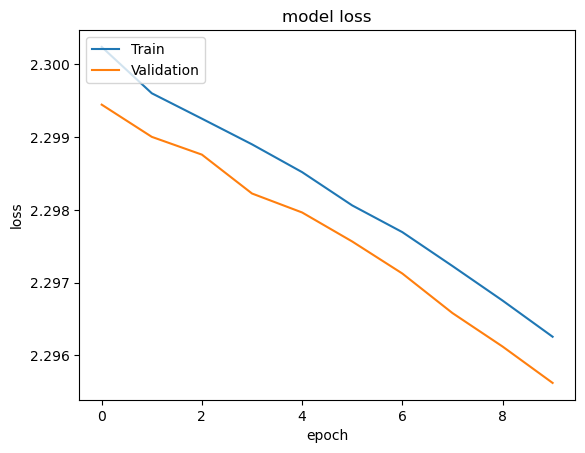

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

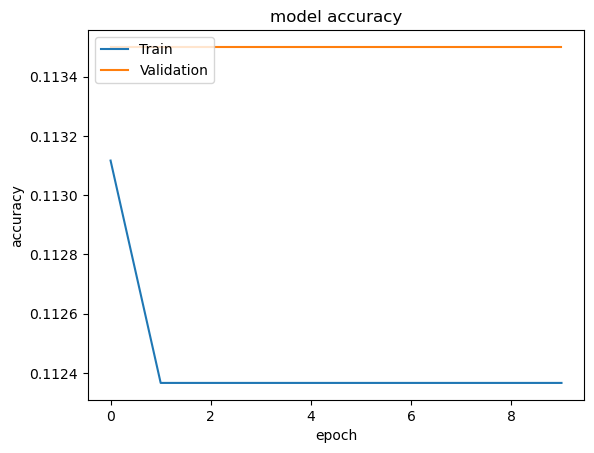

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()